# pyecharts的作图方法与修饰逻辑

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#如果是pyecharts更早的版本可能不需要运行下面的命令
import pyecharts
pyecharts.globals._WarningControl.ShowWarning = False

import warnings
warnings.filterwarnings('ignore')

#隐藏警告

In [3]:
print(pyecharts.__version__)

1.8.1


## python的两种数据作图方案

* matplotlib 简单方便，适合数值作图与科学作图（论文发表）
* pyecharts 流程略微复杂但功能强大，图形为交互式，适合项目开发和商业分析报告(国人开发)；但是这个库的问题也在于是一个非常新的库，开发很不稳定~当前课件版本是pyecharts1.8.1，未来变化可能导致课件代码无法使用。


### 作图的通用流程

1，选择图的类型

2，导入图需要展示的数据

In [4]:
x=list(range(1,8))
#x=[2,1,4,5,7,8,10]
y=[114, 55, 27, 101, 125, 27, 105]

<BarContainer object of 7 artists>

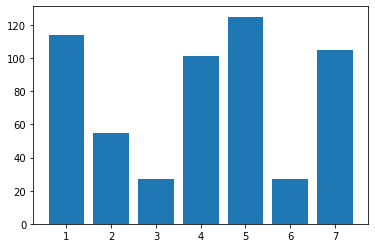

In [5]:
plt.bar(x,y)

In [6]:
from pyecharts import options as opts
from pyecharts.charts import Bar

In [7]:
bar = Bar()
bar.add_xaxis(list(x))
bar.add_yaxis("name", y)
bar.render_notebook()#用来在notebook中展示图形，使用render则会直接保存为html文件

## pyecharts的安装

* anacondas-cmd，会打开一个终端，在此终端中键入拷贝如下命令，并按回车：

pip install pyecharts==1.8.1 -i http://mirrors.aliyun.com/pypi/simple/ --trusted-host=mirrors.aliyun.com

* 当前文档的版本  https://gallery.pyecharts.org/#/README

## 有关pyecharts可视化的学习方法

* 核心逻辑的学习
* 难点
* 应用
* 具体每个图形的实现，看文档绰绰有余

## 代码样式的多种形式

In [8]:
from pyecharts.faker import Faker#这是用来产生伪数据的包

#init_opts=opts.InitOpts(width="420px", height="300px")

In [9]:
#https://gallery.pyecharts.org/#/Bar/bar_base
c = (
    Bar(init_opts=opts.InitOpts(width="620px", height="300px"))
    .add_xaxis(Faker.choose())
    .add_yaxis("商家A", Faker.values())
    .add_yaxis("商家B", Faker.values())
    .set_global_opts(title_opts=opts.TitleOpts(title="Bar-基本示例", subtitle="我是副标题"))
)

In [10]:
c.render_notebook()

In [11]:
b=Bar(init_opts=opts.InitOpts(width="620px", height="300px"))
b.add_xaxis(Faker.choose())
b.add_yaxis("商家A", Faker.values())
b.add_yaxis("商家B", Faker.values())
b.set_global_opts(title_opts=opts.TitleOpts(title="Bar-基本示例", subtitle="我是副标题"))
b.render_notebook()

In [12]:
# 链式调用
Bar(init_opts=opts.InitOpts(width="620px", height="300px")).add_xaxis(Faker.choose()).add_yaxis("商家A", Faker.values()).add_yaxis("商家B", Faker.values()).render_notebook()

## classwork1

* 如果带了自己电脑请在自己电脑上尝试安装pyecharts

* 请从pyecharts主页上复制一段代码下来，在notebook运行并正常显示出图片

## pyecharts的图形修饰逻辑

* pyecharts的主页，也是最重要的学习资源： https://pyecharts.org/#/

### 全局配置项


* 何为全局配置项？何为系列配置项？

* set_global_opts非常重要的修饰函数，负责图形大部分整体的修饰。

第一层次

* 下面是主页说明，注意这个说明和下面代码用法对比：

class TitleOpts(
    # 主标题文本，支持使用 \n 换行。
    title: Optional[str] = None,

In [13]:
from IPython.display import Image
Image("pyecharts1.png")

FileNotFoundError: No such file or directory: 'pyecharts1.png'

FileNotFoundError: No such file or directory: 'pyecharts1.png'

<IPython.core.display.Image object>

In [14]:
bar = Bar(init_opts=opts.InitOpts(width="620px", height="300px"))
bar.add_xaxis(list(x))
bar.add_yaxis("name", y)
bar.set_global_opts(title_opts=opts.TitleOpts(title="Bar-渐变圆柱"))
#注意对比这里修饰的方法与主页对应位置教程的说明，了解pyechart图形修饰模式:
#TitleOpts对应class TitleOpts中的类名，title_opts需要把TitleOpts中的title 小写
bar.render_notebook()

## 配置项之间的层次关系与使用

* 各个配置项class之间的关系并不都是平行的，有很多上下级的关系

* 坐标相关的设置

class AxisOpts(

    # 坐标轴刻度最大值。
    # 可以设置成特殊值 'dataMax'，此时取数据在该轴上的最大值作为最大刻度。
    # 不设置时会自动计算最大值保证坐标轴刻度的均匀分布。
    # 在类目轴中，也可以设置为类目的序数（如类目轴 data: ['类A', '类B', '类C'] 中，序数 2 表示 '类C'。
    # 也可以设置为负数，如 -3）。
 max_: Union[Numeric, str, None] = None,
 
 axisline_opts: Union[AxisLineOpts, dict, None] = None,
 
 axistick_opts: Union[AxisTickOpts, dict, None] = None,
 
 axislabel_opts: Union[LabelOpts, dict, None] = None,
 
 * 注意这些配置项的层次关系：set_global_opts-》xaxis_opts-》AxisOpts-》max_或是axislabel_opts等
 

In [15]:
bar = Bar(init_opts=opts.InitOpts(width="620px", height="300px"))
bar.add_xaxis(list(x))
bar.add_yaxis("name", y)
bar.set_global_opts(xaxis_opts=opts.AxisOpts(max_=8,axisline_opts=opts.AxisLineOpts(is_show=False)))#去掉bar的数字标识
bar.render_notebook()

## classwork2

* 请阅读class TitleOpts的配置项，在上面bar图中加入副标题，内容任意

* 请阅读DataZoomOpts：区域缩放配置项部分，在bar图中加入缩放条

## 系列配置项

* set_series_opts负责很多系列配置项的定义，比如 LabelOpts；MarkPointOpts；AreaStyleOpts

In [16]:
bar = Bar(init_opts=opts.InitOpts(width="620px", height="300px"))
bar.add_xaxis(list(x))
bar.add_yaxis("name", y)
bar.set_series_opts(label_opts=opts.LabelOpts(is_show=False))#去掉bar的数字标识
bar.render_notebook()

* 标记点的设定

class MarkPointOpts(
    # 标记点数据，参考 `series_options.MarkPointItem`
    data: Sequence[Union[MarkPointItem, dict]] = None,
    
class MarkPointItem(
    # 标注名称。
    name: Optional[str] = None,

    # 特殊的标注类型，用于标注最大值最小值等。可选:
    # 'min' 最大值。
    # 'max' 最大值。
    # 'average' 平均值。
    type_: Optional[str] = None,

In [17]:
bar = Bar(init_opts=opts.InitOpts(width="620px", height="300px"))
bar.add_xaxis(list(x))
bar.add_yaxis("name", y)
bar.set_series_opts(
            label_opts=opts.LabelOpts(is_show=False),
            markpoint_opts=opts.MarkPointOpts(
                data=[
                    opts.MarkPointItem(type_="max", name="最大值"),
                    opts.MarkPointItem(type_="min", name="最小值"),
                    opts.MarkPointItem(type_="average", name="平均值"),
                ]
            ))#去掉bar的数字标识
bar.render_notebook()

## 各图形的配置项

* class 与 def 的用法不同

* 有一些系列配置是放在其他地方的，这取决于此配置项用来修饰的对象。比如itemstyle_opts用来修饰bar的颜色时就放在add_yaxis里。要确定配置的使用位置，比如add_yaxsi这种函数包含哪些配置项建议先阅读每个图形最前面的，class说明

In [18]:
bar = Bar(init_opts=opts.InitOpts(width="620px", height="300px"))
bar.add_xaxis(list(x))
bar.add_yaxis("name", y,itemstyle_opts=opts.ItemStyleOpts(color="#d48265"))
bar.render_notebook()

* 有些配置需要在图形函数中配置，比如主题的设定

https://pyecharts.org/#/zh-cn/themes

In [19]:
from pyecharts.globals import ThemeType

In [20]:
#LIGHT DARK CHALK ESSOS PURPLE_PASSION
bar = Bar(init_opts=opts.InitOpts(theme=ThemeType.LIGHT,width="620px", height="300px"))
bar.add_xaxis(x)
bar.add_yaxis("name", y)
bar.render_notebook()

## classwork3

In [21]:
#请尝试再上面bar作图中，引入ESSOS主题，并设置柱标为斜体，并这只字体大小为20
# 在bar作图中，请给图中的最大值，最小值，平均值位置做线标
#在全局设定中定义y轴的最大值为135


In [22]:
#利用新的数据导入模式来自定义每一项的修饰？

## pyecharts的数据类型以及新的数据导入逻辑

https://pyecharts.org/#/zh-cn/data_format

由于pyecharts背后封装的js库，会涉及到数据类型转化。它暂时要求输入数据必须是python的基础数据类型，比如字符串，列表，字典，而不能是序列这样的数据类型。因此序列输入量需要事先被转化为list等基础数据类型才能被pyecharts支持

In [23]:
a=pd.read_csv(r"C:\Users\林之韵\Desktop\py\shoes.csv")

In [24]:
a.columns

Index(['_id.$oid', 'info.上市年份季节', 'info.上市时间', 'info.产品名称', 'info.低帮鞋品名',
       'info.功能', 'info.吊牌价', 'info.品牌', 'info.图案', 'info.场合', 'info.外底材料',
       'info.季节', 'info.尺码', 'info.帮面内里材质', 'info.帮面材质', 'info.性别',
       'info.是否商场同款', 'info.是否瑕疵', 'info.款号', 'info.款式', 'info.流行元素',
       'info.真皮材质工艺', 'info.细分风格', 'info.货号', 'info.跟底款式', 'info.运动系列',
       'info.运动鞋科技', 'info.适合路面', 'info.适用对象', 'info.销售渠道类型', 'info.闭合方式',
       'info.靴子品名', 'info.靴筒内里材质', 'info.靴筒材质', 'info.靴筒高度', 'info.鞋制作工艺',
       'info.鞋垫材质', 'info.鞋头款式', 'info.鞋底材质', 'info.鞋码', 'info.鞋跟高',
       'info.鞋面内里材质', 'info.鞋面材质', 'info.颜色分类', 'info.风格', 'itemid',
       'location', 'nick', 'price', 'sales', 'title', 'url'],
      dtype='object')

In [25]:
a.head(1)

,_id.$oid,info.上市年份季节,info.上市时间,info.产品名称,info.低帮鞋品名,info.功能,info.吊牌价,info.品牌,info.图案,info.场合,...,info.鞋面材质,info.颜色分类,info.风格,itemid,location,nick,price,sales,title,url
0,5aa77041be9b0338dc1faab4,2018年春季,NaN,NaN,商务休闲鞋,轻质,NaN,YEARCON/意尔康,纯色,日常,...,头层牛皮（除牛反绒）,黑色土黄,商务,562121114807,浙江 丽水,意尔康皮鞋旗舰店,269.0,1583人付款,意尔康男鞋2018春季新款英伦真皮商务休闲皮鞋青年男士皮鞋子男潮,http://detail.tmall.com/item.htm?id=5621211148...


In [26]:
p0=a.groupby("info.鞋面材质").size()
p0=p0.sort_values(ascending=False)

### 直角坐标数据类型导入

In [27]:
p0.tolist()

[3470, 671, 605, 80, 35, 21, 15, 14, 12, 10, 9, 8, 8, 7, 6, 4, 2, 1, 1, 1]

In [28]:
bar = Bar(init_opts=opts.InitOpts(width="620px", height="300px"))
bar.add_xaxis(p0.index.tolist())
bar.add_yaxis("商家A", p0.tolist())
bar.set_global_opts(title_opts=opts.TitleOpts(title="某商场销售情况"),toolbox_opts=opts.ToolboxOpts())
bar.render_notebook()

## classwork4

In [29]:
# 翻转上面的bar图的x,y轴
p0=p0.sort_values()

In [30]:
# 做皮鞋材质分布的象形柱状图（PictorialBar）
from pyecharts.charts import Page, PictorialBar
from pyecharts.globals import SymbolType

In [31]:
# 做皮鞋材质数量分布的线图（Line）
from pyecharts.charts import Line

## 其他数据类型导入

In [32]:
from pyecharts.charts import Page, Pie

In [33]:
for i in zip(Faker.choose(), Faker.values()):
    print(i)

('小米', 61)
('三星', 53)
('华为', 43)
('苹果', 66)
('魅族', 39)
('VIVO', 66)
('OPPO', 36)


In [34]:
[list(z) for z in zip(Faker.choose(), Faker.values())]

[['草莓', 31],
 ['芒果', 137],
 ['葡萄', 53],
 ['雪梨', 27],
 ['西瓜', 117],
 ['柠檬', 71],
 ['车厘子', 83]]

In [35]:
p0

info.鞋面材质
羊皮毛一体            1
超纤皮              1
棉布               1
牛仔布              2
鳄鱼皮              4
头层猪皮             6
网布               7
布                8
二层猪皮             8
太空革              9
塑胶              10
牛反绒             12
磨砂皮             14
绒面              15
多种材质拼接          21
超纤              35
人造革             80
二层牛皮（除牛反绒）     605
PU             671
头层牛皮（除牛反绒）    3470
dtype: int64

In [36]:
for i in zip(p0.index.tolist(),p0.tolist()):
    print(i)

('羊皮毛一体', 1)
('超纤皮', 1)
('棉布', 1)
('牛仔布', 2)
('鳄鱼皮', 4)
('头层猪皮', 6)
('网布', 7)
('布', 8)
('二层猪皮', 8)
('太空革', 9)
('塑胶', 10)
('牛反绒', 12)
('磨砂皮', 14)
('绒面', 15)
('多种材质拼接', 21)
('超纤', 35)
('人造革', 80)
('二层牛皮（除牛反绒）', 605)
('PU', 671)
('头层牛皮（除牛反绒）', 3470)


In [37]:
#学习作图的时候要注意判断数据模式
[list(z) for z in zip(p0.index.tolist(), p0.index.tolist())]

[['羊皮毛一体', '羊皮毛一体'],
 ['超纤皮', '超纤皮'],
 ['棉布', '棉布'],
 ['牛仔布', '牛仔布'],
 ['鳄鱼皮', '鳄鱼皮'],
 ['头层猪皮', '头层猪皮'],
 ['网布', '网布'],
 ['布', '布'],
 ['二层猪皮', '二层猪皮'],
 ['太空革', '太空革'],
 ['塑胶', '塑胶'],
 ['牛反绒', '牛反绒'],
 ['磨砂皮', '磨砂皮'],
 ['绒面', '绒面'],
 ['多种材质拼接', '多种材质拼接'],
 ['超纤', '超纤'],
 ['人造革', '人造革'],
 ['二层牛皮（除牛反绒）', '二层牛皮（除牛反绒）'],
 ['PU', 'PU'],
 ['头层牛皮（除牛反绒）', '头层牛皮（除牛反绒）']]

In [38]:
f2=Pie(init_opts=opts.InitOpts(width="820px", height="300px")).add("", [list(z) for z in zip(p0.index.tolist(), p0.tolist())])
f2.set_series_opts(label_opts=opts.LabelOpts(is_show=False))
f2.set_global_opts(
            title_opts=opts.TitleOpts(title="Pie-Radius"),
            legend_opts=opts.LegendOpts(
                orient="vertical", pos_top="15%", pos_left="2%"
            ),
        )
f2.render_notebook()

## classwork 5

In [39]:
# 做皮鞋材质数量分布的漏斗图（Funnel）
from pyecharts.charts import Funnel, Page

### 新的数据导入逻辑——单点修饰

* 将在后续版本强制执行的新逻辑：baritem 

* 警告：
C:\Users\wp\anaconda3\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)

In [40]:
#help(Bar)
#help中的文档似乎比官网更详细

In [41]:
y1=[]
for i in y:
    y1.append(opts.BarItem(value=i,name=str(i)+"aaa"))
y1

In [42]:
#baritem带来的是深入到坐标点层次上的修饰
y1=[]
c=["pink","red","yellow","pink","red","yellow","blue"]
for i in range(0,7):
    y1.append(opts.BarItem(value=y[i],name=str(i)+"aaa",itemstyle_opts=opts.ItemStyleOpts(color=c[i])))
y1
#注意定义的优先级，越微观的定义优先级越高

In [43]:
bar = Bar(init_opts=opts.InitOpts(width="620px", height="300px"))
bar.add_xaxis(x)
bar.add_yaxis("name", y1,itemstyle_opts=opts.ItemStyleOpts(color="#d48265"),)
bar.render_notebook()

## classwork6

In [44]:
# 通过BarItem改变每个柱子的透明度，透明的大小有随机数决定

In [45]:
import random
random.random()

0.002092446447413354

In [46]:
# 求“info.鞋面内里材质”的各个材质的商品数量，请分别做bar,Line,Funnel,pie，PictorialBar 图来可视化此数据(注意数据类型转换)